# Notebook to read from a clip_analysis pickle file
- Note: you might need to softlink the 'clip_analysis_legacy' or 'clipper' folders to the directory where this notebook is being run. This is to get around the pickle loading errors you might get:

```
ln -s /home/bay001/projects/codebase/clip_analysis_legacy/clip_analysis_legacy ./
ln -s /projects/ps-yeolab3/bay001/codebase/clipper/clipper ./
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle
import glob
from tqdm import tnrange, tqdm_notebook

colors = sns.color_palette("hls", 8)

# As an example, try compare IDR peak kmers with rep2 

In [2]:
p1 = '/projects/ps-yeolab3/encode/analysis/encode_idr_clip_analysis/204.01v02.IDR.out.0102merged.bed.annotated.clip_formatted.bed.clip_analysis.pickle'
p2 = '/projects/ps-yeolab3/encode/analysis/encode_master/204_02_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle'

In [3]:
loaded1 = pd.read_pickle(p1)
loaded2 = pd.read_pickle(p2)

/projects/ps-yeolab4/software/eclipconda/envs/python2essential-0.0.1/lib/python2.7/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [4]:
# look at all the info inside the pickle file
loaded1.keys()

['reads_per_cluster',
 'kmer_results',
 'motif_distances',
 'genic_region_sizes',
 'reads_out_clusters',
 'type_count',
 'phast_values',
 'distributions',
 'cluster_lengths',
 'features_transcript_closest',
 'reads_in_clusters',
 'genomic_type_count',
 'region_read_counts',
 'regions',
 'motifs',
 'region_sizes',
 'classes',
 'data',
 'homerout',
 'features_mrna_closest']

In [5]:
# access kmer counts:
loaded1['kmer_results'].keys()

['three_prime_utrs',
 'all',
 'five_prime_utrs',
 'distintron500',
 'cds',
 'proxintron500']

## plot kmer_enrichment for 'all regions'  
 

('TGCATG', 64.32777124076931, 63.397641050940756)


/projects/ps-yeolab4/software/eclipconda/envs/python2essential-0.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/projects/ps-yeolab4/software/eclipconda/envs/python2essential-0.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


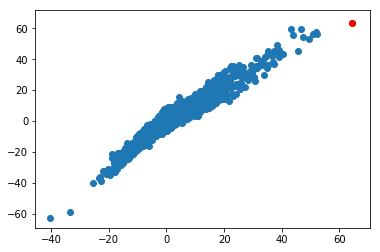

In [6]:
kmer_len = 6
moi = ['TGCATG'] # we can highlight specific kmers

def plot_zscore_enrichment(loaded1, loaded2, moi=[]):
    motif_scores1 = {}
    motif_scores2 = {}
    for key, value in loaded1['kmer_results']['all'][kmer_len].iteritems():
        motif_scores1[key] = value.delta
        motif_scores2[key] = loaded2['kmer_results']['all'][kmer_len][key].delta

    join1 = pd.DataFrame(motif_scores1,index=['rep1']).T
    join2 = pd.DataFrame(motif_scores2,index=['rep2']).T
    merged = pd.merge(join1, join2, how='left', left_index=True, right_index=True)
    x = plt.scatter(merged['rep1'],merged['rep2'])
    
    for m in moi:
        x = plt.scatter(merged['rep1'].ix[m], merged['rep2'].ix[m], color='red')
        print(m, merged['rep1'].ix[m], merged['rep2'].ix[m])
        
plot_zscore_enrichment(loaded1, loaded2, moi)

# PIE chart for plotting 'clusters  content' (region distribution of reads in clusters)

In [7]:
p1 = '/projects/ps-yeolab3/encode/analysis/encode_idr_clip_analysis/204.01v02.IDR.out.0102merged.bed.annotated.clip_formatted.bed.clip_analysis.pickle'
# loaded1 = pickle.load(open(p1, 'rb'))
loaded1 = pd.read_pickle(p1)

In [8]:
loaded1['region_sizes']

{'all': 403863,
 'cds': 13762,
 'distintron500': 178322,
 'five_prime_utrs': 3839,
 'proxintron500': 190146,
 'three_prime_utrs': 17815,
 'uncatagorized': 118698}

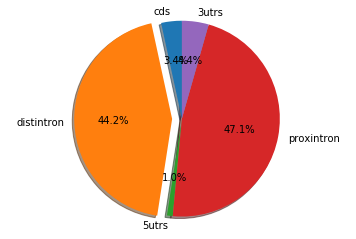

In [9]:
labels = 'cds', 'distintron', '5utrs', 'proxintron', '3utrs' # , 'na'
sizes = [
    loaded1['region_sizes']['cds'], 
    loaded1['region_sizes']['distintron500'], 
    loaded1['region_sizes']['five_prime_utrs'], 
    loaded1['region_sizes']['proxintron500'], 
    loaded1['region_sizes']['three_prime_utrs'], 
    # loaded1['region_sizes']['uncatagorized'], # usually remove, hard to explain these peaks or if they're even real
]

explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice to highlight, useful for pointing out specific regions.

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# If you just want the background

In [10]:
loaded1['genic_region_sizes']

{'cds': 15679420,
 'distintron500': 385321126,
 'five_prime_utrs': 1887136,
 'proxintron500': 76973159,
 'three_prime_utrs': 11841255}

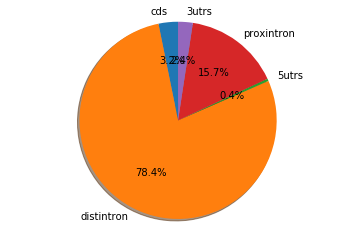

In [11]:
sizes = [
    loaded1['genic_region_sizes']['cds'], 
    loaded1['genic_region_sizes']['distintron500'], 
    loaded1['genic_region_sizes']['five_prime_utrs'], 
    loaded1['genic_region_sizes']['proxintron500'], 
    loaded1['genic_region_sizes']['three_prime_utrs'], 
]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
